# 1. Información inicial

**Challenge Telecom X**

Análisis de evasión de clientes (Churn de clientes)

**Objetivo:**

Buscar, tratar y realizar un análisis exploratorio de los datos de la empresa. Es decir, todo el proceso ETL.



# 2. Extracción

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2.1 Carga archivo json desde API

In [3]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

telecom = response.json() 
telecom = pd.json_normalize(telecom, sep='_')
# Quita los prefijos: customer_, phone_, etc.
telecom.columns = [col.split('_')[-1] for col in telecom.columns]

df_telecom = pd.DataFrame(telecom)
df_telecom.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2.2 Revisa nulos

In [4]:
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

# 3. Transformación

## 3.1 Tipos de datos del conjunto

### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [5]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## 3.2 Conversión de columnas

### 3.2.1 Convertir columna ```Churn``` en bool

In [6]:
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes':True, 'No':False}).astype(bool)
df_telecom['Churn'].dtypes

dtype('bool')

### 3.2.2 Convertir columna ```SeniorCitizen``` en bool

In [7]:
df_telecom['SeniorCitizen'] = df_telecom['SeniorCitizen'].map({0:False, 1:True}).astype(bool)
df_telecom['SeniorCitizen'].dtypes

dtype('bool')

### 3.2.3 Convertir el resto de columnas con yes, no en bool
```Partner, Dependents, PhoneService, MultipleLines, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling```

In [8]:
cols_a_Bool = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df_telecom[cols_a_Bool] = df_telecom[cols_a_Bool].map(lambda x: True if x == 'Yes' else False).astype(bool)

### 3.2.4 Convertir columna ```Total``` en float

In [9]:
df_telecom['Total'] = pd.to_numeric(df_telecom['Total'], errors='coerce')
df_telecom['Total'].dtypes

dtype('float64')

## 3.3 Revisa si hay duplicados

In [10]:
df_telecom[df_telecom.duplicated()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


No hay duplicados

## 3.4 Revisa si hay nulos

In [11]:
df_telecom.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Monthly              0
Total               11
dtype: int64

In [12]:
df_telecom[df_telecom['Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,False,DSL,...,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,True,DSL,...,True,False,True,False,False,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,False,No,...,False,False,False,False,False,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,True,DSL,...,True,True,True,True,False,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,False,DSL,...,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,False,DSL,...,True,True,False,True,True,Two year,False,Mailed check,80.85,NaN


In [13]:
df_telecom.dropna(inplace=True)
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

## 3.4 Creación columna ```Cuentas_diarias```

In [14]:
df_telecom['Cuentas_diarias'] = round(df_telecom['Monthly']/30, 2)
df_telecom[['Monthly', 'Cuentas_diarias']]

,Monthly,Cuentas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
...,...,...
7262,55.15,1.84
7263,85.10,2.84
7264,50.30,1.68
7265,67.85,2.26


# 4. Carga y análisis

## 4.1 Análisis descriptivo

In [15]:
df_telecom.describe()

,tenure,Monthly,Total,Cuentas_diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158467
std,24.558067,30.125739,2268.632997,1.004282
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.450000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.900000,3785.300000,3.000000
max,72.000000,118.750000,8684.800000,3.960000


## 4.2 Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

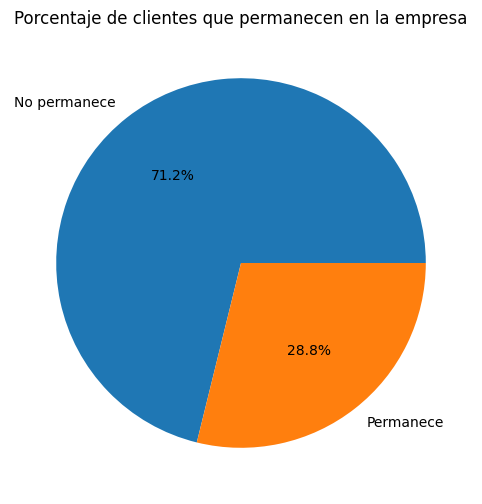

In [20]:
etiquetas = {True: 'Permanece', False: 'No permanece'}
col_Churn = df_telecom['Churn'].map(etiquetas)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(col_Churn.value_counts(),labels=col_Churn.value_counts().index, autopct='%1.1f%%')

ax.set_title('Porcentaje de clientes que permanecen en la empresa')

plt.show()

### 4.2.1 Distribución de evasión por género

In [50]:
col_Churn_genero = df_telecom.groupby('Churn')['gender'].value_counts()
col_Churn_genero

Churn  gender
False  Male      2619
       Female    2544
True   Male      1050
       Female    1043
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

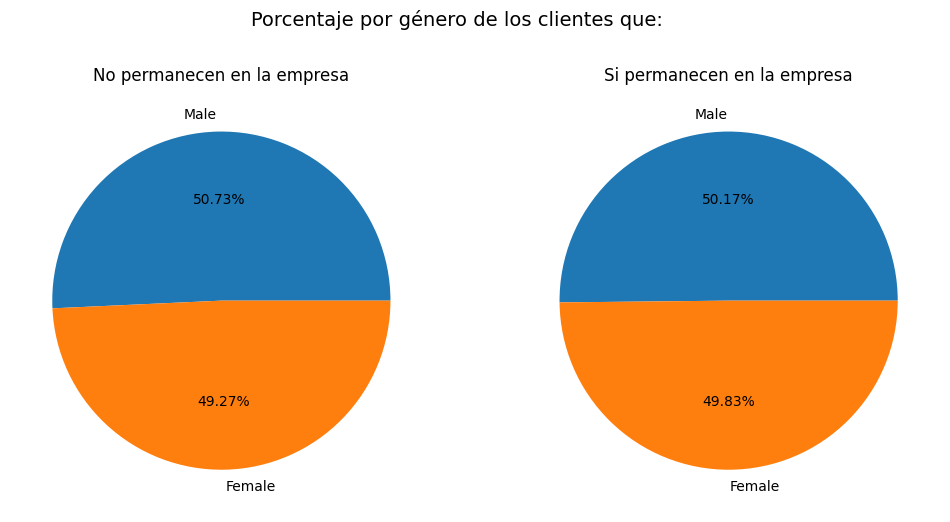

In [74]:
churn_false_data = col_Churn_genero.loc[False]
churn_true_data = col_Churn_genero.loc[True]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('Porcentaje por género de los clientes que: ', fontsize=14)

ax[0].set_title('No permanecen en la empresa')
ax[0].pie(churn_false_data,labels=churn_false_data.index, autopct='%.2f%%')

ax[1].set_title('Si permanecen en la empresa')
ax[1].pie(churn_true_data, labels=churn_true_data.index, autopct='%.2f%%')

plt.show

# 5. Informe final